# 2-D Exploratory Data Analysis: Exploratory Scatterplots on U.S. Census Tracts with EJI Variables and Power Plants

In this notebook we will pick ONE variable you're interested in understanding from your non-census data and plot it against various census variables in scatterplots or dotplots.

### Standard Python and R imports

In [129]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [130]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [131]:
%%R

# My commonly used R imports

require('tidyverse')

In [132]:
df = pd.read_csv('plants_merged_eji.csv')

In [133]:
df.shape

(88364, 195)

In [134]:
df['plant_name'].nunique()

9230

## Load the data

In [135]:
%%R
 
# Import data with R
df <- read_csv('plants_merged_eji.csv', show_col_types = FALSE)
df

# A tibble: 88,364 × 195
   STATEFP COUNTYFP TRACTCE AFFGEOID         GEOID GEOID_2020 COUNTY_x StateDesc
     <dbl>    <dbl>   <dbl> <chr>            <dbl>      <dbl> <chr>    <chr>    
 1       1        1   20804 140000US010010… 1.00e9 1001020804 Autauga… Alabama  
 2       1        3   10706 140000US010030… 1.00e9 1003010706 Baldwin… Alabama  
 3       1        3   11503 140000US010030… 1.00e9 1003011503 Baldwin… Alabama  
 4       1        3   11604 140000US010030… 1.00e9 1003011604 Baldwin… Alabama  
 5       1        5  950100 140000US010059… 1.01e9 1005950100 Barbour… Alabama  
 6       1        9   50501 140000US010090… 1.01e9 1009050501 Blount … Alabama  
 7       1        9   50701 140000US010090… 1.01e9 1009050701 Blount … Alabama  
 8       1       13  952700 140000US010139… 1.01e9 1013952700 Butler … Alabama  
 9       1       13  952900 140000US010139… 1.01e9 1013952900 Butler … Alabama  
10       1       13  953200 140000US010139… 1.01e9 1013953200 Butler … Alabama  
# ℹ

In addition: Warning message:
One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat) 


In [136]:
%%R

colnames(df)

  [1] "STATEFP"                            "COUNTYFP"                          
  [3] "TRACTCE"                            "AFFGEOID"                          
  [5] "GEOID"                              "GEOID_2020"                        
  [7] "COUNTY_x"                           "StateDesc"                         
  [9] "STATEABBR"                          "LOCATION"                          
 [11] "E_TOTPOP"                           "M_TOTPOP"                          
 [13] "E_DAYPOP"                           "SPL_EJI"                           
 [15] "RPL_EJI"                            "SPL_SER"                           
 [17] "RPL_SER"                            "SPL_EJI_CBM"                       
 [19] "RPL_EJI_CBM"                        "E_MINRTY"                          
 [21] "EPL_MINRTY"                         "SPL_SVM_DOM1"                      
 [23] "RPL_SVM_DOM1"                       "E_POV200"                          
 [25] "EPL_POV200"                      

# Exploratory data analysis



## 2-D visualizations (aka scatter plots)

It seems simple. It's not simple. mainly because...

**CORRELATION =/= CAUSATION**

Comparing variables to one another can be TRICKY!

Let's make some 2-D visualizations (aka scatter plots).

Be VERY careful how you phrase the headlines. Take time to think through what you want to say.




`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2415 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 2415 rows containing missing values or values outside the scale range
(`geom_point()`). 



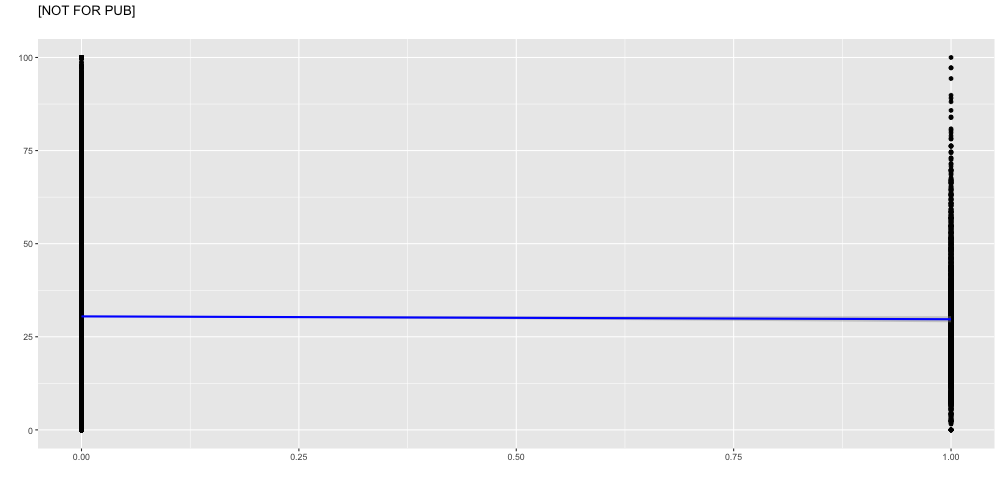

In [137]:
%%R -w 1000

ggplot(df) +
    aes(x=fossil_fuels, y=E_POV200) +
    geom_point() +
    geom_smooth(method="lm", se=TRUE, color="blue") +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2415 rows containing missing values or values outside the scale range
(`geom_point()`). 



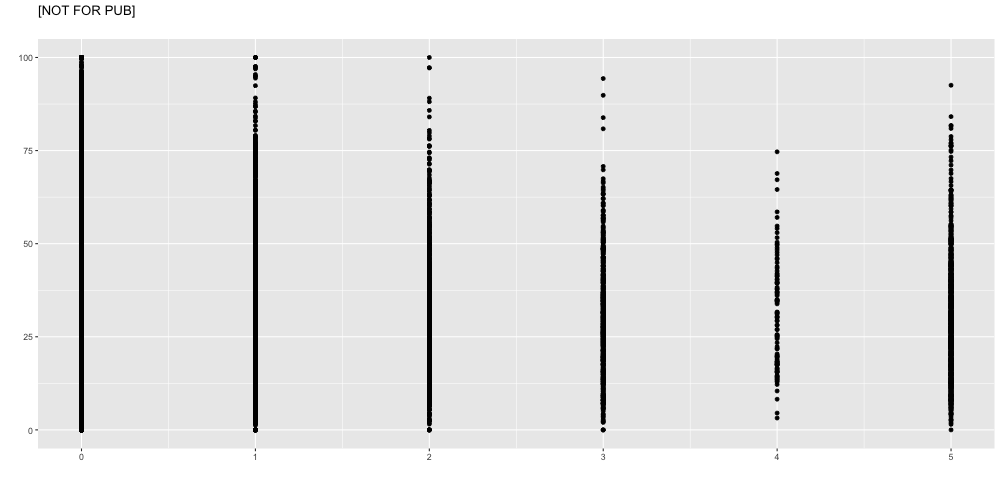

In [138]:
%%R -w 1000

ggplot(df) +
    aes(x=energy_category_numeric, y=E_POV200) +
    geom_point() +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2415 rows containing non-finite outside the scale range
(`stat_boxplot()`). 



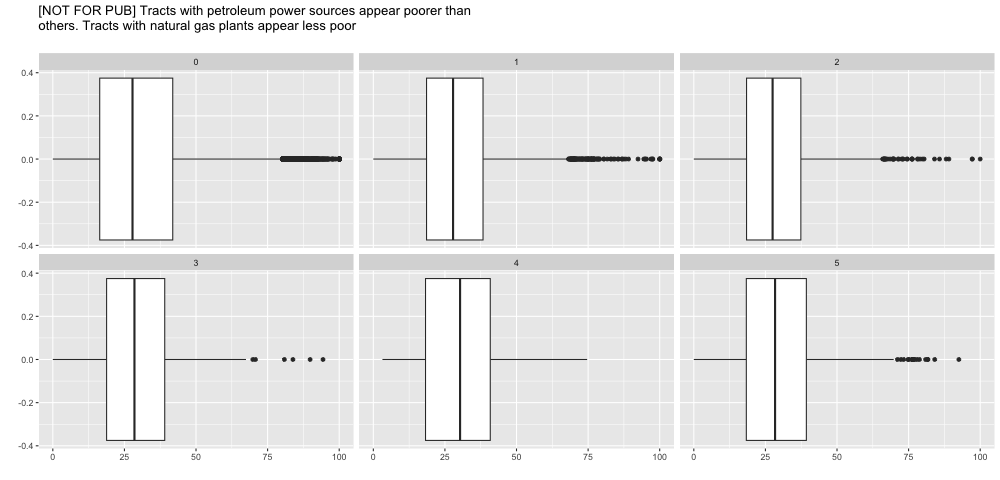

In [139]:
%%R -w 1000

ggplot(df) +
    aes(x=E_POV200) +
    geom_boxplot() +
    facet_wrap(~energy_category_numeric) +
    labs(title=str_wrap("[NOT FOR PUB] Tracts with petroleum power sources appear poorer than others. Tracts with natural gas plants appear less poor", width=75), 
         subtitle="", x="", y="")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2360 rows containing non-finite outside the scale range
(`stat_boxplot()`). 



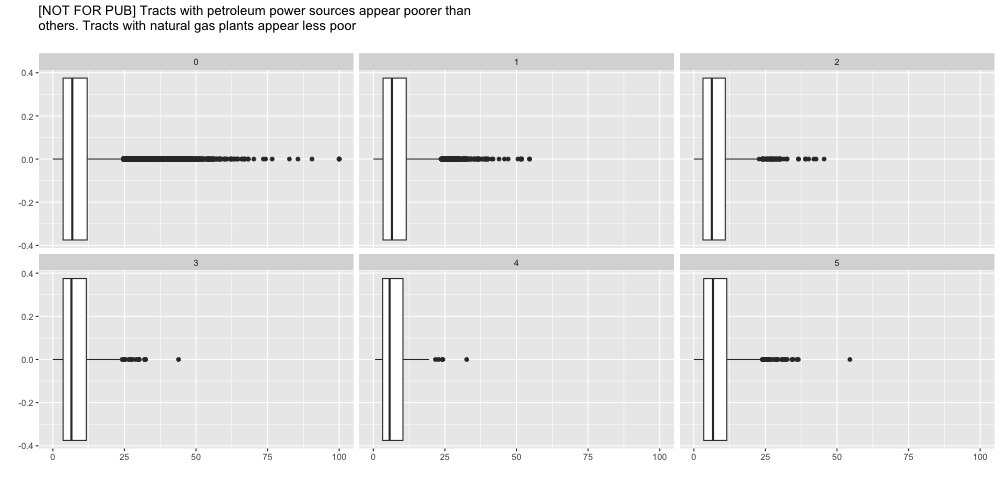

In [140]:
%%R -w 1000

ggplot(df) +
    aes(x=E_UNINSUR) +
    geom_boxplot() +
    facet_wrap(~energy_category_numeric) +
    labs(title=str_wrap("[NOT FOR PUB] Tracts with petroleum power sources appear poorer than others. Tracts with natural gas plants appear less poor", width=75), 
         subtitle="", x="", y="")


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 2360 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 2360 rows containing missing values or values outside the scale range
(`geom_point()`). 



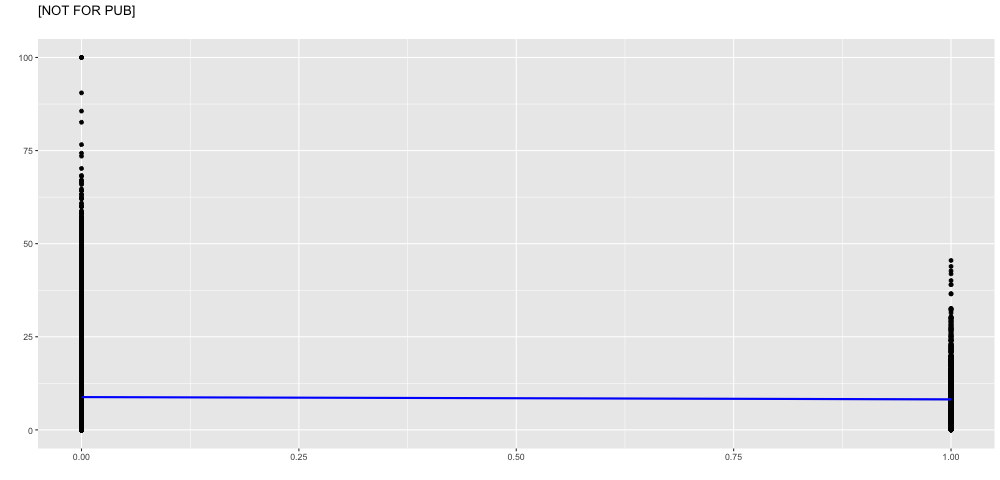

In [141]:
%%R -w 1000

ggplot(df) +
    aes(x=fossil_fuels, y=E_UNINSUR) +
    geom_point() +
    geom_smooth(method="lm", se=TRUE, color="blue") +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


In [142]:
%%R

library(dplyr)

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_UNINSUR = median(E_UNINSUR, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_UNINSUR
             <dbl>            <dbl>
 1               0              6.8
 2               1              6.4
 3               2              6.3
 4               3              6.6
 5               4              6.6
 6               5              6.7
 7               6              6.5
 8               7              6.8
 9               8              5.7
10               9              7.1


In [143]:
%%R

library(dplyr)

df %>%
  group_by(Category_Number) %>%
  summarise(median_AFAM = median(E_AFAM, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_AFAM
             <dbl>       <dbl>
 1               0         4.2
 2               1         1.6
 3               2         1.6
 4               3         1.3
 5               4         1.4
 6               5         1.4
 7               6         1.9
 8               7         1.3
 9               8         2.1
10               9         2.2


### Tracts with nuclear power plants have a higher % of African American people

In [144]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_POV200 = median(E_POV200, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_POV200
             <dbl>           <dbl>
 1               0            27.8
 2               1            27.7
 3               2            27.5
 4               3            27.6
 5               4            28.3
 6               5            28.5
 7               6            28.5
 8               7            28.1
 9               8            30.3
10               9            24.4


### Tracts with coal seem to be associated with a higher median poverty rate than other types of energy

In [145]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_CANCER = median(E_CANCER, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_CANCER
             <dbl>           <dbl>
 1               0             7.9
 2               1             9.1
 3               2             9.2
 4               3             9.3
 5               4             9.2
 6               5             9.2
 7               6             9  
 8               7             9.2
 9               8             9.2
10               9             8.8


### Tracts with all types of power plants seem to have higher median cancer rates than tracts without power plants. The highest is in tracts with coal, but tracts with wind, hydroelectric power and petroleum aren't far behind

In [146]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_IMPWTR = median(E_IMPWTR, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_IMPWTR
             <dbl>           <dbl>
 1               0           0.498
 2               1           0.295
 3               2           0.306
 4               3           0.277
 5               4           0.309
 6               5           0.290
 7               6           0.259
 8               7           0.287
 9               8           0.376
10               9           0.303


### Of tracts with power plants, after hydroelectric power, tracts with coal intersects most with impaired or impacted watersheds - but lower than the national median across tracts that don't have power plants

In [147]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_ASTHMA = median(E_ASTHMA, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_ASTHMA
             <dbl>         <dbl>
 1               0          10.5
 2               1          10.7
 3               2          10.8
 4               3          10.8
 5               4          10.8
 6               5          10.8
 7               6          10.6
 8               7          10.8
 9               8          10.7
10               9          10.9


### Tracts with all types of power plants have a higher percentage of asthma, the highest in tracts with nuclear powerplants and other types of powerplants

In [148]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_withdrawal_volume_million_gallons = median(withdrawal_volume_million_gallons, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_withdrawal_volume_million_gallons
             <dbl>                                    <dbl>
 1               0                                      NA 
 2               1                                     832 
 3               2                                     895 
 4               3                                      NA 
 5               4                                      NA 
 6               5                                    4154 
 7               6                                   15162.
 8               7                                    1580 
 9               8                                    2543 
10               9                                  196834 


### Nuclear powerplants are withdrawing the most amount of water, by far

In [149]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_discharge_volume_million_gallons = median(discharge_volume_million_gallons, na.rm = TRUE)) %>%
    arrange(desc(median_discharge_volume_million_gallons))

# A tibble: 10 × 2
   Category_Number median_discharge_volume_million_gallons
             <dbl>                                   <dbl>
 1               9                                 121762.
 2               6                                  15162.
 3               7                                   1844.
 4               5                                   1446.
 5               8                                    540.
 6               2                                    152 
 7               1                                      0 
 8               0                                     NA 
 9               3                                     NA 
10               4                                     NA 


### After 'other', nuclear power plants discharge the most water

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 2360 rows containing missing values or values outside the scale range
(`geom_point()`). 



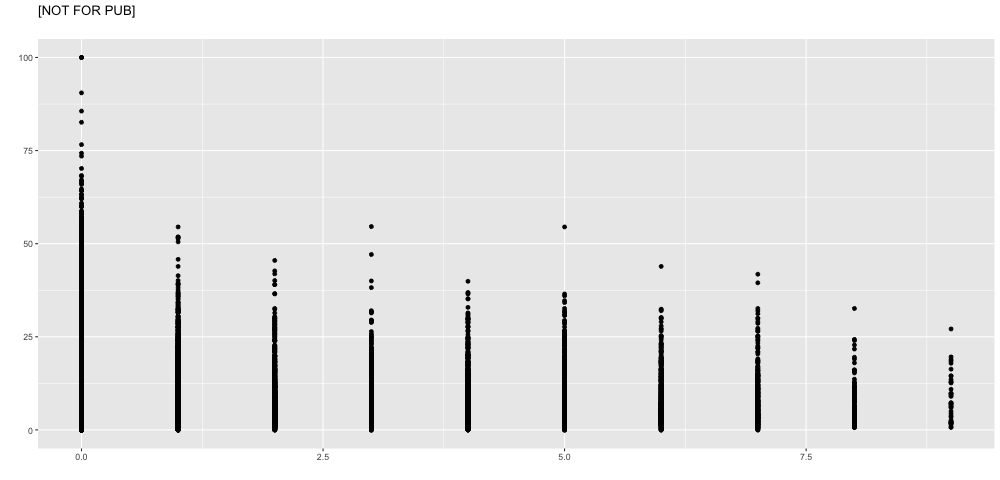

In [150]:
%%R -w 1000

ggplot(df) +
    aes(x=`Category_Number`, y=E_UNINSUR) +
    geom_point() +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")
